EDA

In [7]:
%pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn
%pip install imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Exploratory Data Analysis (EDA)

In [9]:
path = r'./data/Updated_Merged_Data_with_Engagement.csv'

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv(path)

# Overview of the dataset
print(df.shape)  # Number of rows and columns
print(df.info()) # Data types and non-null counts
print(df.head()) # First few rows of the dataset
print(df.describe())  # Summary statistics for numerical columns


(1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeID            1000 non-null   int64  
 1   Department            1000 non-null   object 
 2   DiscussionCount       1000 non-null   float64
 3   AverageRating         1000 non-null   float64
 4   FeedbackCount         1000 non-null   float64
 5   TotalCourseCount      1000 non-null   int64  
 6   AverageQuizScore      1000 non-null   int64  
 7   TotalTimeSpent        1000 non-null   int64  
 8   EngagementLevelScore  1000 non-null   float64
 9   EngagementLevel       1000 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 78.3+ KB
None
   EmployeeID   Department  DiscussionCount  AverageRating  FeedbackCount  \
0           1   Operations             0.00           0.00           0.00   
1           2  Engineering             1.42      

In [11]:
print(df.isnull().sum())


EmployeeID              0
Department              0
DiscussionCount         0
AverageRating           0
FeedbackCount           0
TotalCourseCount        0
AverageQuizScore        0
TotalTimeSpent          0
EngagementLevelScore    0
EngagementLevel         0
dtype: int64


In [65]:
import pandas as pd


# Check the distribution of the target variable 'EngagementLevel'
class_distribution = df['EngagementLevel'].value_counts(normalize=True) * 100
print(class_distribution)

EngagementLevel
Low       93.5
Medium     6.5
Name: proportion, dtype: float64


Numerical Features:
Histograms: Visualize the distribution of numeric features.
Boxplots: Detect outliers and visualize the spread of the data.

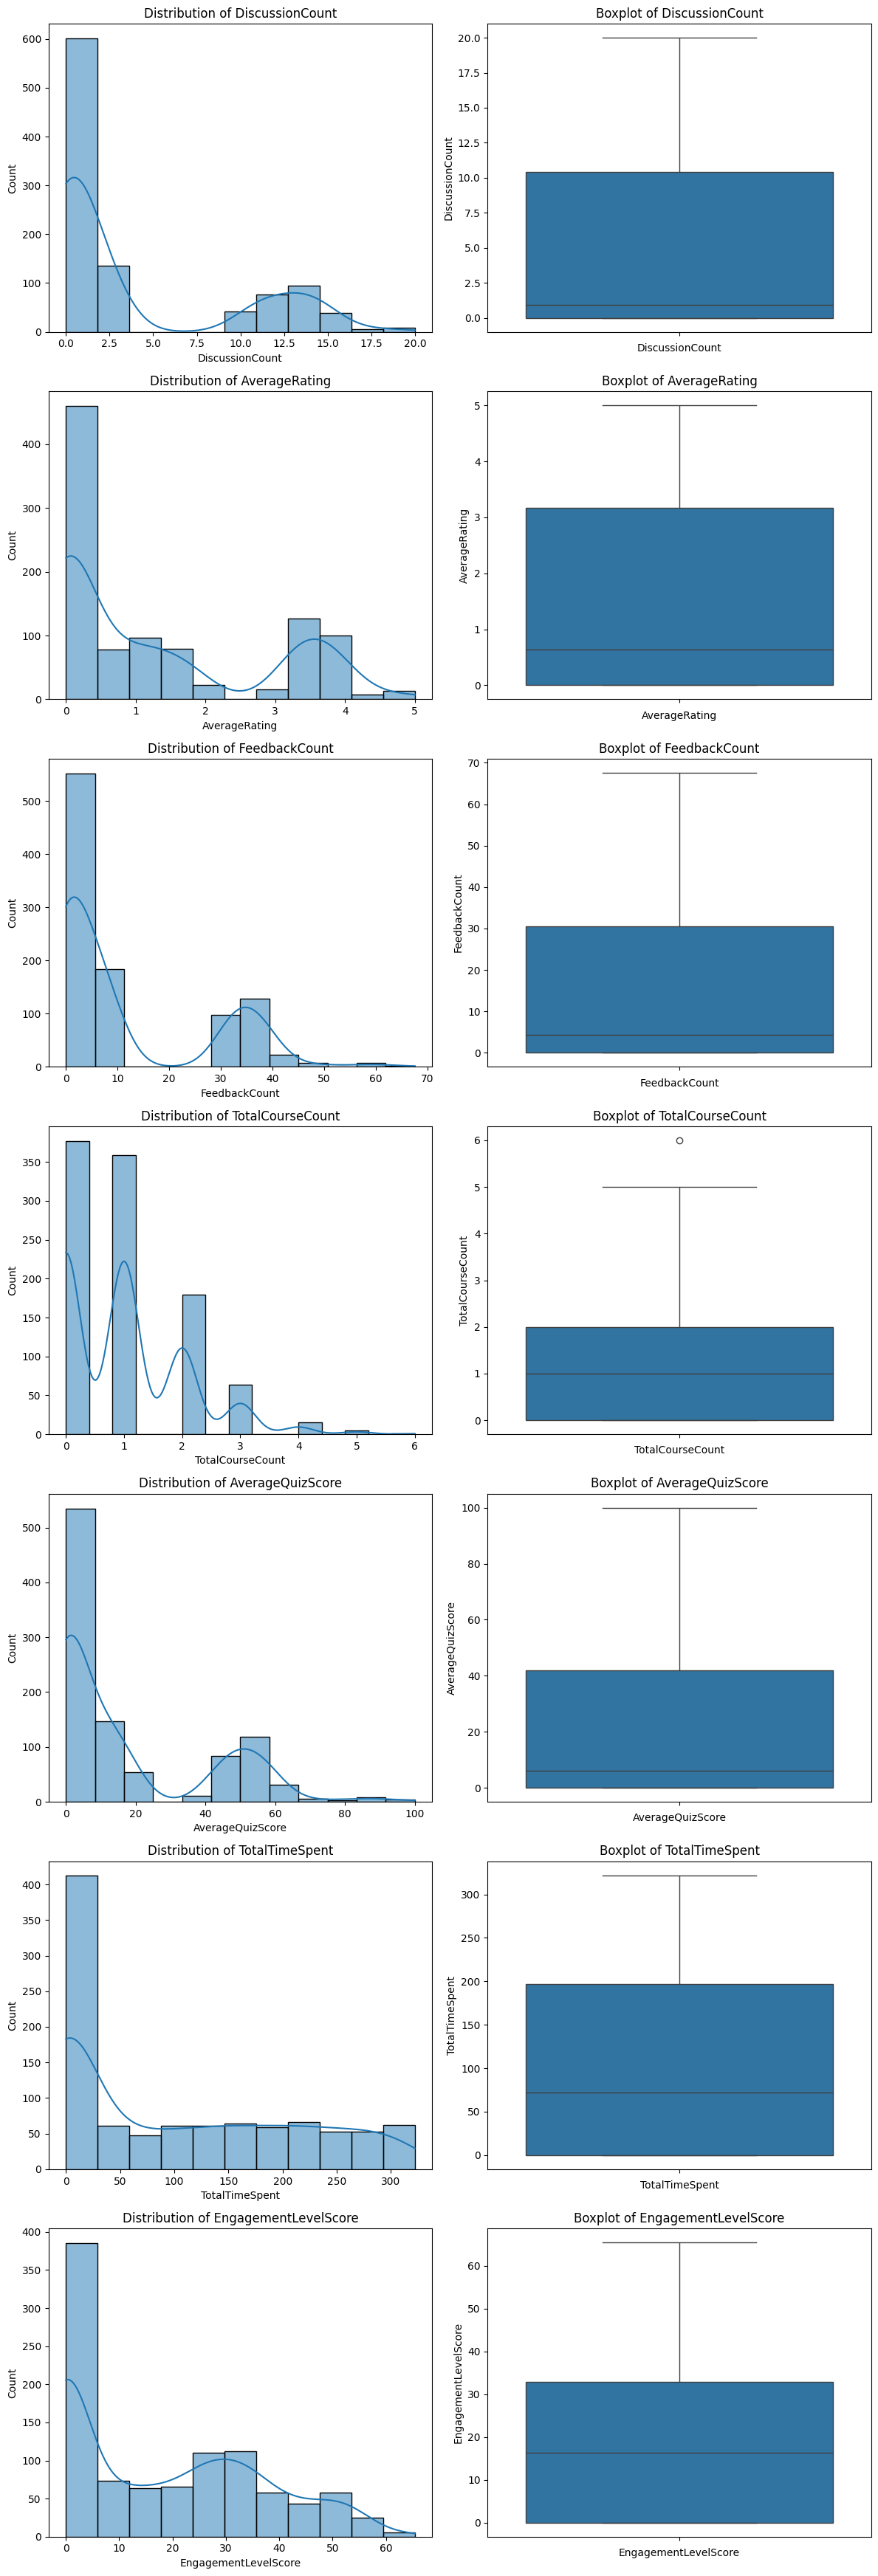

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the employee data
path = r'C:\Users\SubhamSwarupPradhan\Desktop\Data_Final_Project\data_science\data\Updated_Merged_Data_with_Engagement.csv'
final_data = pd.read_csv(path)
final_data.columns = final_data.columns.str.strip()

# Convert to a DataFrame
df = pd.DataFrame(final_data)

# List of numerical columns you want to visualize
features = ['DiscussionCount', 'AverageRating', 'FeedbackCount', 'TotalCourseCount', 
            'AverageQuizScore', 'TotalTimeSpent', 'EngagementLevelScore']

# Plotting the histogram and boxplot for each feature
fig, axes = plt.subplots(len(features), 2, figsize=(12, len(features)*5))

for i, feature in enumerate(features):
    # Histogram for each feature
    sns.histplot(df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}')
    axes[i, 0].set_xlabel(feature)

    # Boxplot for each feature
    sns.boxplot(df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {feature}')
    axes[i, 1].set_xlabel(feature)

plt.tight_layout()
plt.show()


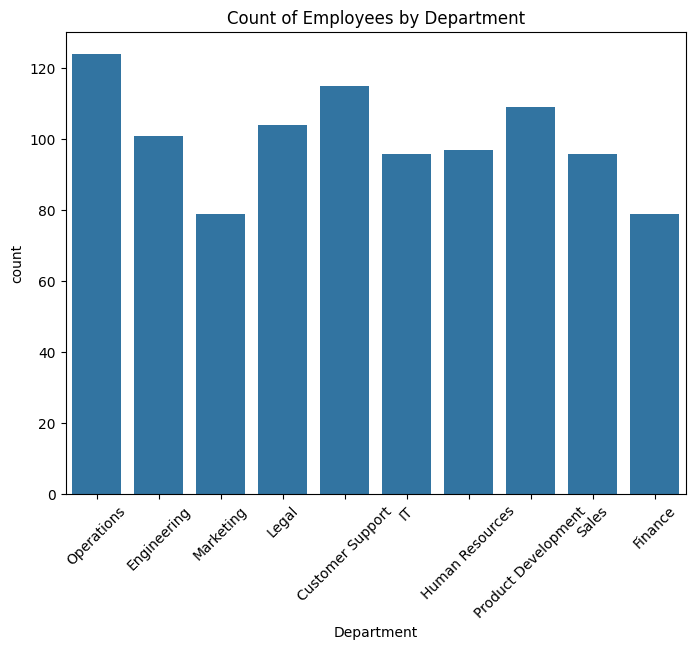

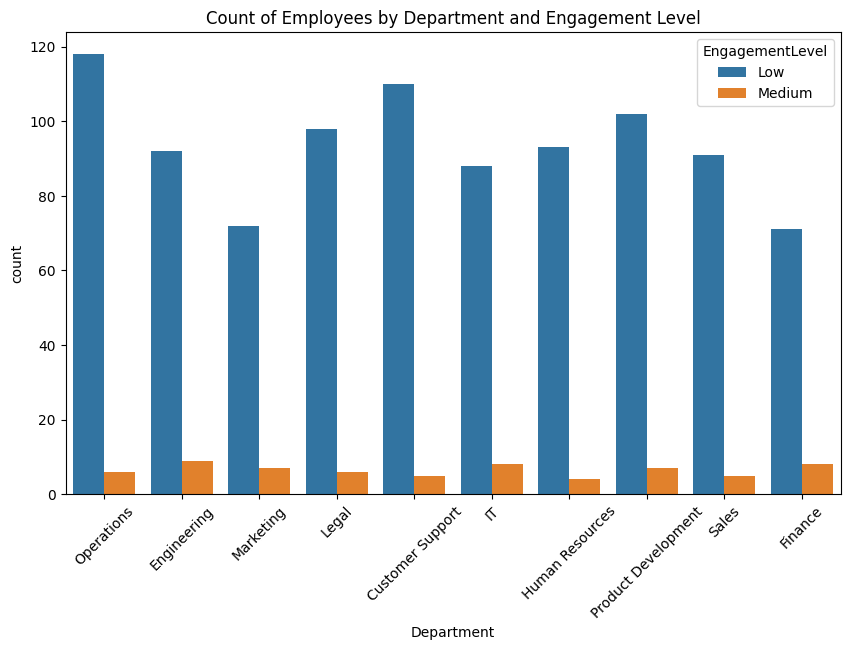

In [14]:
# Count plot for categorical variable 'Department'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Department')
plt.title('Count of Employees by Department')
plt.xticks(rotation=45)
plt.show()
# Count plot showing 'Department' and 'EngagementLevel'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='EngagementLevel')
plt.title('Count of Employees by Department and Engagement Level')
plt.xticks(rotation=45)
plt.show()


In [120]:
class_distribution = df['EngagementLevel'].value_counts(normalize=True) * 100

In [121]:
print("Class distribution (percentage):")
print(class_distribution)

Class distribution (percentage):
EngagementLevel
Low       93.5
Medium     6.5
Name: proportion, dtype: float64


In [122]:
final_data.columns

Index(['EmployeeID', 'Department', 'DiscussionCount', 'AverageRating',
       'FeedbackCount', 'TotalCourseCount', 'AverageQuizScore',
       'TotalTimeSpent', 'EngagementLevelScore', 'EngagementLevel'],
      dtype='object')

In [123]:
final_data.head()

,EmployeeID,Department,DiscussionCount,AverageRating,FeedbackCount,TotalCourseCount,AverageQuizScore,TotalTimeSpent,EngagementLevelScore,EngagementLevel
0,1,Operations,0.00,0.00,0.00,0,0,0,0.0000,Low
1,2,Engineering,1.42,1.31,2.10,1,14,293,34.0315,Low
2,3,Operations,13.64,3.98,36.02,2,48,174,40.7270,Low
3,4,Marketing,0.00,0.00,0.00,0,0,0,0.0000,Low
4,5,Engineering,10.43,3.11,39.23,3,45,137,36.2595,Low


In [124]:
df['EngagementLevel'] = df['EngagementLevel'].map({'Low': 0, 'Medium': 1}) 

In [209]:
features

['DiscussionCount',
 'AverageRating',
 'FeedbackCount',
 'TotalCourseCount',
 'AverageQuizScore',
 'TotalTimeSpent',
 'EngagementLevelScore']

In [125]:
df.sample(n=10)

,EmployeeID,Department,DiscussionCount,AverageRating,FeedbackCount,TotalCourseCount,AverageQuizScore,TotalTimeSpent,EngagementLevelScore,EngagementLevel
609,610,Engineering,1.61,1.21,1.50,1,8,214,24.5245,0
150,151,Customer Support,12.61,3.77,35.31,2,57,101,35.2765,0
481,482,Engineering,11.80,3.51,35.78,2,52,96,33.3935,0
784,785,Engineering,0.37,1.03,9.70,1,1,165,19.2215,0
832,833,Product Development,0.00,0.00,0.00,0,0,0,0.0000,0
292,293,Operations,0.00,0.00,0.00,0,0,0,0.0000,0
223,224,Product Development,1.63,0.39,9.58,1,4,219,25.4395,0
204,205,Engineering,1.31,1.01,8.53,1,16,322,38.6205,0
771,772,Product Development,0.00,0.00,0.00,0,0,0,0.0000,0
79,80,Customer Support,2.27,1.24,5.73,1,11,38,8.6600,0


In [126]:
X = df[features]
y = df['EngagementLevel']

Original class distribution: Counter({0: 935, 1: 65})


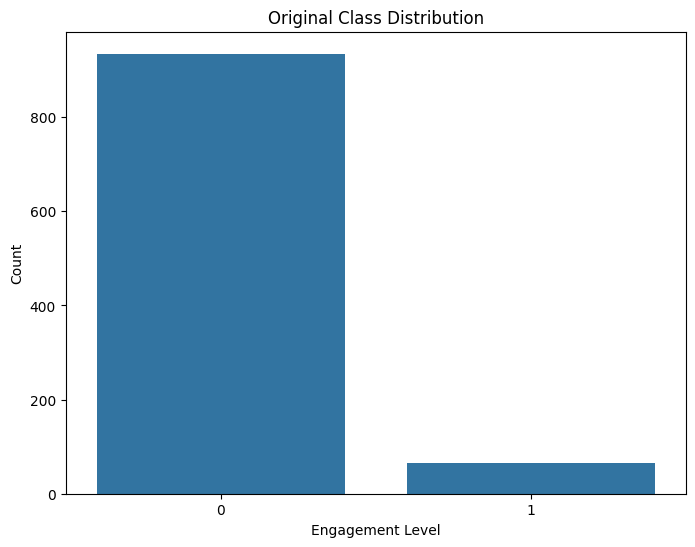

In [127]:
print("Original class distribution:", Counter(y))

# Plot original class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.xlabel("Engagement Level")
plt.ylabel("Count")
plt.show()

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 2: Random Oversampling


In [129]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)


In [130]:
print("Oversampled class distribution:", Counter(y_oversampled))

Oversampled class distribution: Counter({0: 747, 1: 747})


In [168]:
# df.to_csv(r'C:\Users\SubhamSwarupPradhan\Desktop\Data_Final_Project\data_science\data\oversampled_data.csv', index=False)

Step 3: SMOTE

In [102]:

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [115]:
print("SMOTE class distribution:", Counter(y_smote))

SMOTE class distribution: Counter({0: 747, 1: 747})


In [169]:
# df.to_csv(r'C:\Users\SubhamSwarupPradhan\Desktop\Data_Final_Project\data_science\data\smote_data.csv', index=False)


Step 4: Random Undersampling

In [131]:

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

In [105]:
print("Undersampled class distribution:", Counter(y_undersampled))

Undersampled class distribution: Counter({0: 53, 1: 53})


In [170]:
# df.to_csv(r'C:\Users\SubhamSwarupPradhan\Desktop\Data_Final_Project\data_science\data\undersampled_data.csv', index=False)


Step 5: ADASYN

In [132]:
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

In [171]:
# df.to_csv(r'C:\Users\SubhamSwarupPradhan\Desktop\Data_Final_Project\data_science\data\adasyn_data.csv', index=False)


Step 6: Combined Oversampling and Undersampling

In [133]:

combined = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_combined, y_combined = combined.fit_resample(X_train, y_train)
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_combined, y_combined = undersampler.fit_resample(X_combined, y_combined)

In [134]:
print("Combined class distribution:", Counter(y_combined))

Combined class distribution: Counter({0: 747, 1: 747})


In [173]:
combined_df = pd.DataFrame(X_combined, columns=features)
combined_df['EngagementLevel'] = y_combined

In [174]:
# combined_df.to_csv(r'C:\Users\SubhamSwarupPradhan\Desktop\Data_Final_Project\data_science\data\combined_data.csv', index=False)


 Step 7: Class Weighting Example

In [135]:

from sklearn.ensemble import RandomForestClassifier

In [136]:
# Train a model with class weights (this does not create a new dataset, but shows an approach)
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [137]:
print("Class weights:", clf.class_weight)

Class weights: balanced


In [166]:
df.sample(n=10)

,EmployeeID,Department,DiscussionCount,AverageRating,FeedbackCount,TotalCourseCount,AverageQuizScore,TotalTimeSpent,EngagementLevelScore,EngagementLevel
126,127,Sales,0.00,0.00,0.00,0,0,0,0.0000,0
23,24,Operations,12.51,3.88,37.12,2,41,91,30.6460,0
139,140,Marketing,0.00,0.00,0.00,0,0,0,0.0000,0
523,524,IT,14.32,3.55,35.50,2,53,318,56.3015,1
816,817,IT,0.00,0.00,0.00,0,0,0,0.0000,0
375,376,Product Development,0.00,0.00,0.00,0,0,0,0.0000,0
987,988,Sales,0.73,0.98,9.90,1,14,91,15.1710,0
112,113,Customer Support,0.00,0.00,0.00,0,0,0,0.0000,0
684,685,Product Development,10.78,3.23,34.58,2,41,139,34.4295,0
158,159,Customer Support,0.00,0.00,0.00,0,0,0,0.0000,0


4. Correlation heatmap

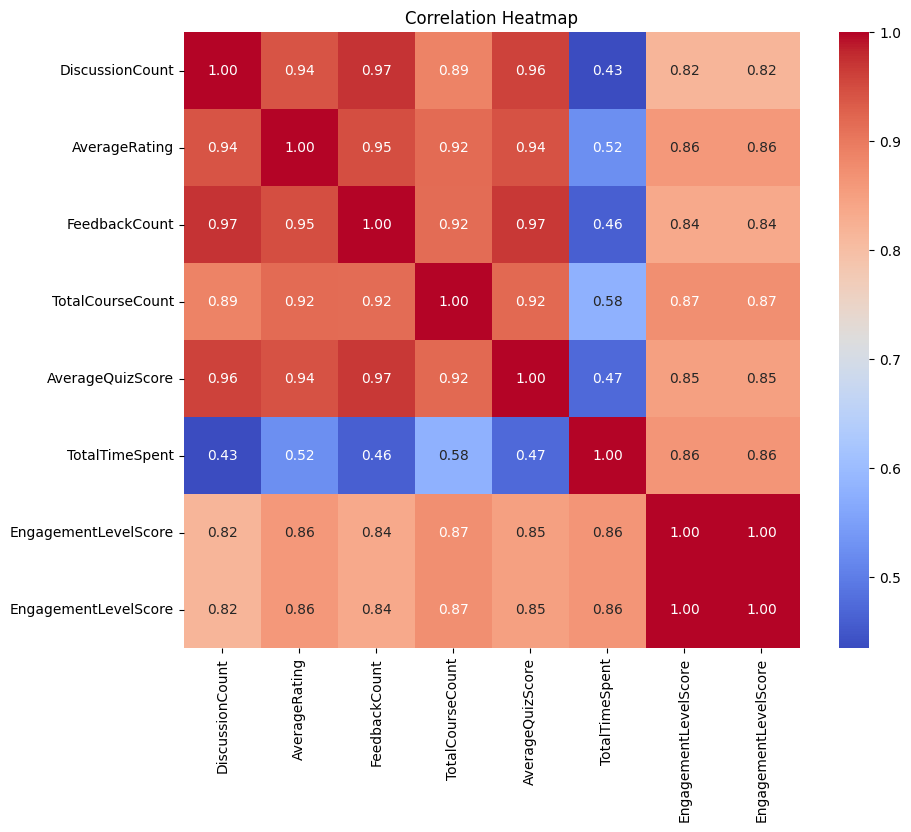

EDA completed successfully!


In [19]:

# Select only numeric columns for correlation
numeric_df = df[features + ['EngagementLevelScore']]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

print("EDA completed successfully!")

In [188]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [190]:
df.columns

Index(['EmployeeID', 'Department', 'DiscussionCount', 'AverageRating',
       'FeedbackCount', 'TotalCourseCount', 'AverageQuizScore',
       'TotalTimeSpent', 'EngagementLevelScore', 'EngagementLevel'],
      dtype='object')

In [195]:
df.columns = df.columns.str.strip()

# Check available columns
print("Available columns:", df.columns.tolist())

# Select features and target variable
X = df.drop(columns=['EngagementLevel', 'EmployeeID'])  
y = df['EngagementLevel']

# If Department is available, include it in the features
if 'Department' in df.columns:
    categorical_features = ['Department']
else:
    categorical_features = []  # Adjust this if necessary

numerical_features = X.columns.difference(categorical_features)

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scaling numerical features
        ('cat', OneHotEncoder(), categorical_features)   # Encoding categorical features
    ],
    remainder='passthrough'  # Keep remaining columns (if any)
)

# Create a pipeline with preprocessing and (optional) polynomial features
degree = 2  # Degree of polynomial features
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),  # Creating polynomial features
])

# Fit and transform the features
X_transformed = pipeline.fit_transform(X)

# Split the transformed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Show the shape of the transformed features
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Available columns: ['EmployeeID', 'Department', 'DiscussionCount', 'AverageRating', 'FeedbackCount', 'TotalCourseCount', 'AverageQuizScore', 'TotalTimeSpent', 'EngagementLevelScore', 'EngagementLevel']
Shape of X_train: (800, 170)
Shape of X_test: (200, 170)


In [194]:
print(df.columns.tolist())


['EmployeeID', 'Department', 'DiscussionCount', 'AverageRating', 'FeedbackCount', 'TotalCourseCount', 'AverageQuizScore', 'TotalTimeSpent', 'EngagementLevelScore', 'EngagementLevel']


In [193]:
df.columns = df.columns.str.strip()


In [196]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [197]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00        13

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

[[187   0]
 [  0  13]]


In [198]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [210]:
df.describe()


,EmployeeID,DiscussionCount,AverageRating,FeedbackCount,TotalCourseCount,AverageQuizScore,TotalTimeSpent,EngagementLevelScore,EngagementLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,3.956880,1.314790,11.624700,1.000000,17.61500,104.317000,18.480464,0.065000
std,288.819436,5.595478,1.513083,15.323206,1.026184,22.78596,107.426314,18.100238,0.246649
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,500.500000,0.935000,0.645000,4.380000,1.000000,6.00000,72.000000,16.266250,0.000000
75%,750.250000,10.435000,3.172500,30.575000,2.000000,42.00000,197.250000,32.873750,0.000000
max,1000.000000,19.990000,5.000000,67.580000,6.000000,100.00000,322.000000,65.408500,1.000000
